In [47]:
import  pandas as pd

In [48]:
dataset = pd.read_csv('datasets/Training_augmented.csv').dropna(axis=1)

In [49]:
dataset.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [50]:
dataset.shape

(9840, 133)

**There are total 41 unique diseases**

In [51]:
print(dataset['prognosis'].unique()) #numpy array
len(dataset['prognosis'].unique())

['Fungal infection' 'Allergy' 'GERD' 'Chronic cholestasis' 'Drug Reaction'
 'Peptic ulcer diseae' 'AIDS' 'Diabetes ' 'Gastroenteritis'
 'Bronchial Asthma' 'Hypertension ' 'Migraine' 'Cervical spondylosis'
 'Paralysis (brain hemorrhage)' 'Jaundice' 'Malaria' 'Chicken pox'
 'Dengue' 'Typhoid' 'hepatitis A' 'Hepatitis B' 'Hepatitis C'
 'Hepatitis D' 'Hepatitis E' 'Alcoholic hepatitis' 'Tuberculosis'
 'Common Cold' 'Pneumonia' 'Dimorphic hemmorhoids(piles)' 'Heart attack'
 'Varicose veins' 'Hypothyroidism' 'Hyperthyroidism' 'Hypoglycemia'
 'Osteoarthristis' 'Arthritis' '(vertigo) Paroymsal  Positional Vertigo'
 'Acne' 'Urinary tract infection' 'Psoriasis' 'Impetigo']


41

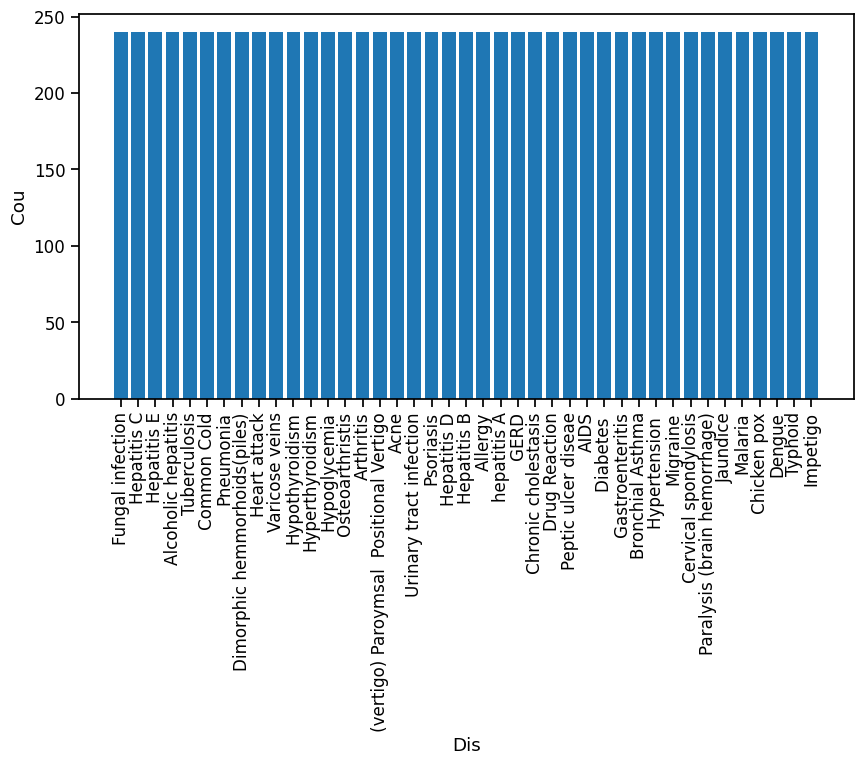

In [52]:
# Checking whether the dataset is balanced or not
import matplotlib.pyplot as plt
import seaborn as sns
disease_counts = dataset["prognosis"].value_counts()
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})
 
plt.figure(figsize = (10,5))
plt.bar(temp_df['Disease'], temp_df['Counts'])
plt.xlabel("Dis")
plt.ylabel("Cou")
#sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()

In [81]:
X = dataset.drop('prognosis' , axis = 1)
Y = dataset['prognosis']
X = X.values
Y = Y.values
print(Y)
features = dataset.columns.values[:-1]
print(dataset.columns)

['Fungal infection' 'Fungal infection' 'Fungal infection' ...
 'Urinary tract infection' 'Psoriasis' 'Impetigo']
Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)


In [54]:
print(X)
print(features)

[[1 1 1 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 1 0 ... 0 1 0]
 [0 1 0 ... 1 1 1]]
['itching' 'skin_rash' 'nodal_skin_eruptions' 'continuous_sneezing'
 'shivering' 'chills' 'joint_pain' 'stomach_pain' 'acidity'
 'ulcers_on_tongue' 'muscle_wasting' 'vomiting' 'burning_micturition'
 'spotting_ urination' 'fatigue' 'weight_gain' 'anxiety'
 'cold_hands_and_feets' 'mood_swings' 'weight_loss' 'restlessness'
 'lethargy' 'patches_in_throat' 'irregular_sugar_level' 'cough'
 'high_fever' 'sunken_eyes' 'breathlessness' 'sweating' 'dehydration'
 'indigestion' 'headache' 'yellowish_skin' 'dark_urine' 'nausea'
 'loss_of_appetite' 'pain_behind_the_eyes' 'back_pain' 'constipation'
 'abdominal_pain' 'diarrhoea' 'mild_fever' 'yellow_urine'
 'yellowing_of_eyes' 'acute_liver_failure' 'fluid_overload.1'
 'swelling_of_stomach' 'swelled_lymph_nodes' 'malaise'
 'blurred_and_distorted_vision' 'phlegm' 'throat_irritation'
 'redness_of_eyes' 'sinus_pressure' 'runny_nose' 'con

**Encoding prognosis values to numerical values**

In [55]:
from sklearn.preprocessing import LabelEncoder

In [56]:
'''le = LabelEncoder()
le.fit(Y)
Y = le.transform(Y)

from sklearn.preprocessing import LabelEncoder'''

# Initialize and fit the LabelEncoder
le = LabelEncoder()
le.fit(Y)

# Transform the labels
encoded_Y = le.transform(Y)
Y = le.transform(Y)
print(Y)
# Print the original labels and their corresponding encoded values
# for original, encoded in zip(Y, encoded_Y):
#     print(f"Original: {original}, Encoded: {encoded}")

# To find which value corresponds to which label:
# print("\nLabel mappings:")
# for label, class_ in zip(le.transform(le.classes_), le.classes_):
#     print(f"Encoded value {label} -> Original label {class_}")


[15 15 15 ... 38 35 27]


Original: Hypoglycemia, Encoded: 25
Original: Osteoarthristis, Encoded: 31
Original: Arthritis, Encoded: 5
Original: (vertigo) Paroymsal  Positional Vertigo, Encoded: 0
Original: Acne, Encoded: 2
Original: Urinary tract infection, Encoded: 38
Original: Psoriasis, Encoded: 35
Original: Impetigo, Encoded: 27
Original: Fungal infection, Encoded: 15
Original: Allergy, Encoded: 4
Original: GERD, Encoded: 16
Original: Chronic cholestasis, Encoded: 9
Original: Drug Reaction, Encoded: 14
Original: Peptic ulcer diseae, Encoded: 33
Original: AIDS, Encoded: 1
Original: Diabetes , Encoded: 12
Original: Gastroenteritis, Encoded: 17
Original: Bronchial Asthma, Encoded: 6
Original: Hypertension , Encoded: 23
Original: Migraine, Encoded: 30
Original: Cervical spondylosis, Encoded: 7
Original: Paralysis (brain hemorrhage), Encoded: 32
Original: Jaundice, Encoded: 28
Original: Malaria, Encoded: 29
Original: Chicken pox, Encoded: 8
Original: Dengue, Encoded: 11
Original: Typhoid, Encoded: 37
Original: he

In [57]:
Y

array([15, 15, 15, ..., 38, 35, 27])

**splitting the data into training and testing data**

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train , X_test , y_train , y_test = train_test_split(X , Y , test_size = 0.2 , random_state = 28)

**Training top 5 models**

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

In [61]:
from sklearn.model_selection import StratifiedKFold
models = {
    "SVC" : SVC(kernel = 'linear'),
    "RandomForest" : RandomForestClassifier(n_estimators = 100 , random_state = 42),
    "KNN" : KNeighborsClassifier(n_neighbors = 5),
    "GaussianNB" : GaussianNB() 
}

In [62]:
skf = StratifiedKFold(n_splits = 10)
scores = {
    "SVC" : [],
    "RandomForest" : [],
    "KNN" : [],
    "GaussianNB" : []
}
for train_index, test_index in skf.split(X, Y):
    x_train, y_train = X[train_index], Y[train_index] 
    x_test, y_test = X[test_index], Y[test_index]
    #x_train_fold, x_test_fold = X[train_index], X[test_index]
    #y_train_fold, y_test_fold = Y[train_index], Y[test_index]
    for model_name , model in models.items():
        model.fit(x_train_fold , y_train_fold)
        scores[model_name].append(model.score(x_test_fold, y_test_fold))

In [63]:
for model_name , model_scores in scores.items():
    print(model_name , end = " ")
    print("Stratified K-Fold mean accuracy is : " , np.mean(model_scores) * 100 , "%")

SVC Stratified K-Fold mean accuracy is :  99.01422764227641 %
RandomForest Stratified K-Fold mean accuracy is :  98.76016260162602 %
KNN Stratified K-Fold mean accuracy is :  99.35975609756098 %
GaussianNB Stratified K-Fold mean accuracy is :  90.22357723577237 %


Accuracy on train data by SVC is 98.9329268292683


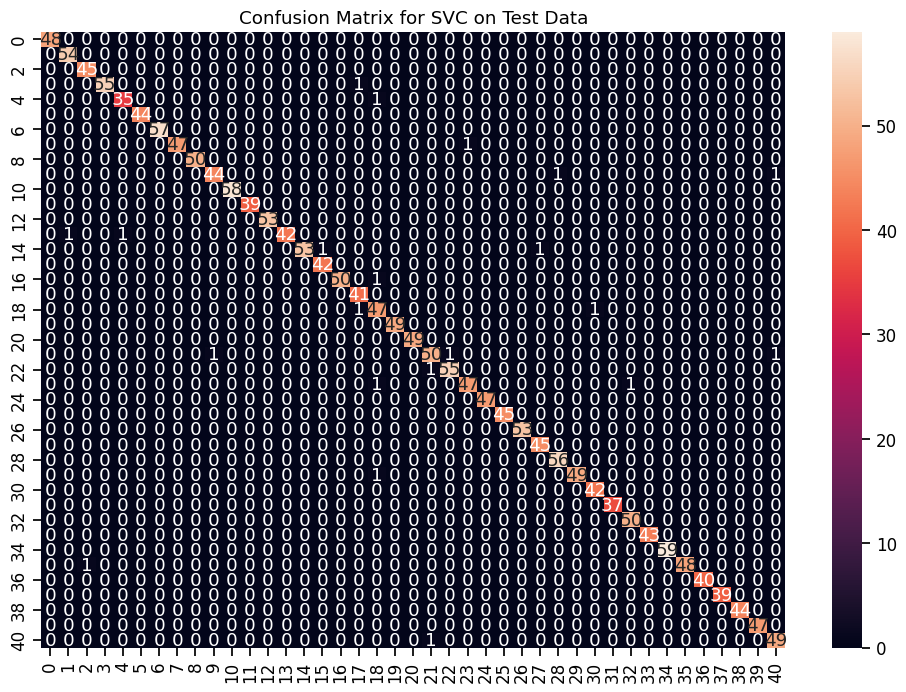

Accuracy on train data by RandomForest is 98.8821138211382


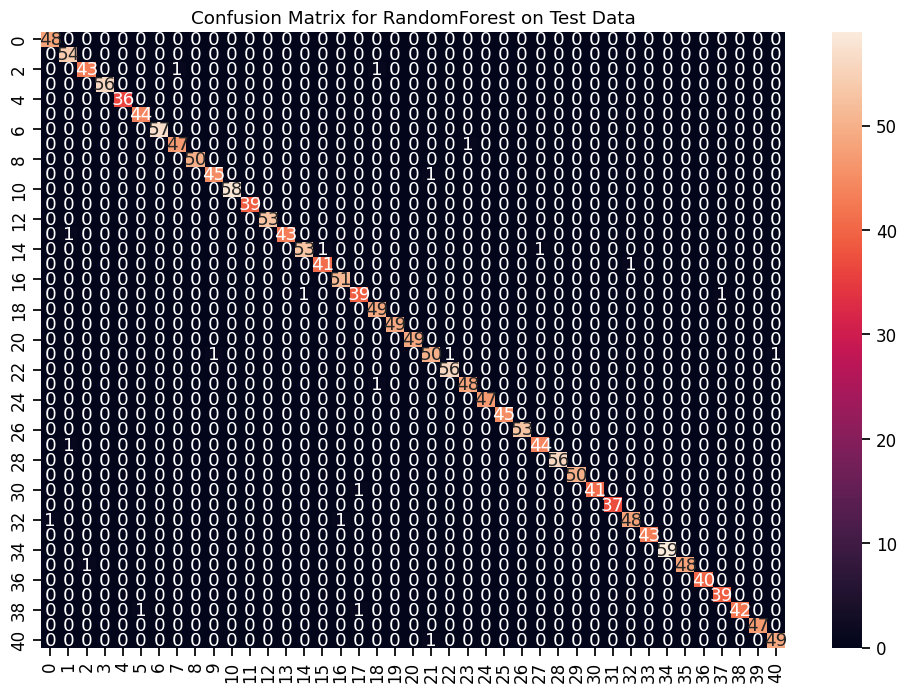

Accuracy on train data by KNN is 99.64430894308943


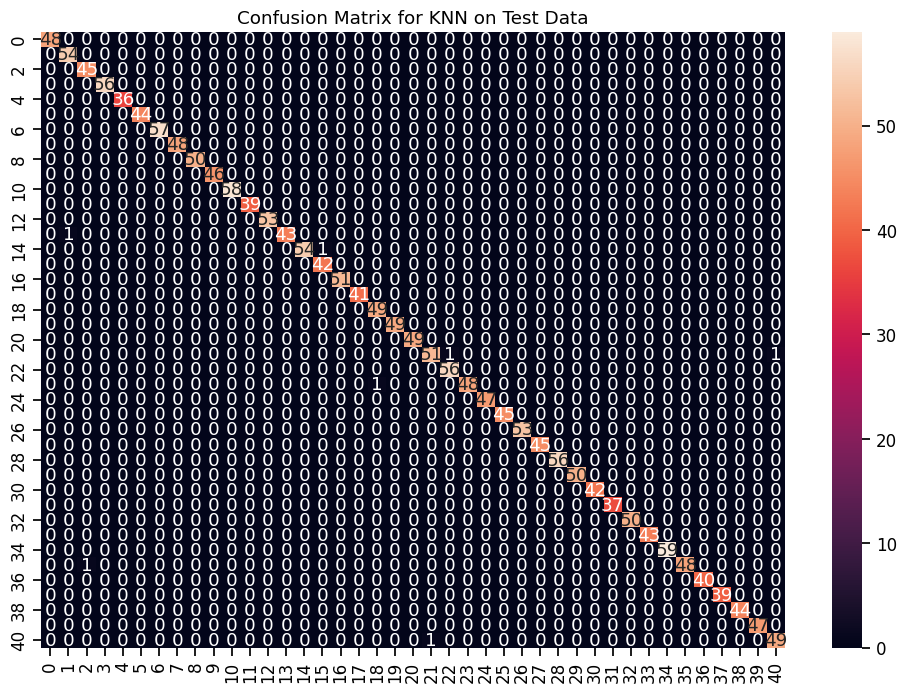

Accuracy on train data by GaussianNB is 89.73577235772358


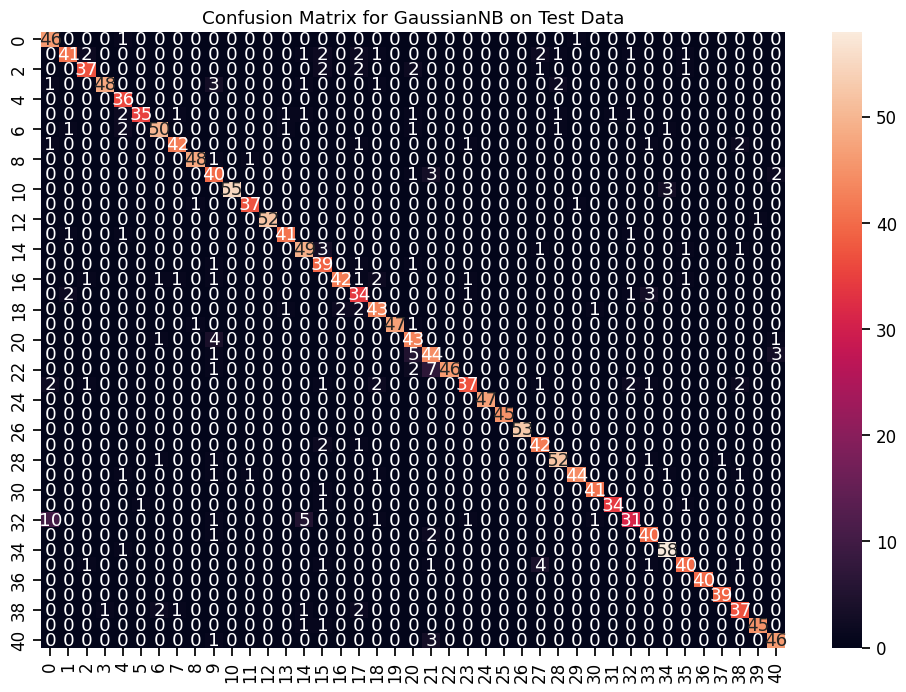

In [64]:
#finding the confusion matrices for differenet types of classifiers
for model_name , model in models.items():
    #training the model
    model.fit(X_train , y_train)
    #testing the model
    predictions = model.predict(X_test) 
    accuracy = accuracy_score(y_test , predictions)
    print(f"Accuracy on train data by {model_name} is {accuracy * 100}")
    cf_matrix = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(12,8))
    sns.heatmap(cf_matrix, annot=True)
    plt.title(f"Confusion Matrix for {model_name} on Test Data")
    plt.show()    

In [65]:
final_models = {
    "SVC" : SVC(kernel = 'linear'),
    "RandomForest" : RandomForestClassifier(n_estimators = 100 , random_state = 42),
    "KNN" : KNeighborsClassifier(n_neighbors = 5),
    "GaussianNB" : GaussianNB() 
}

In [74]:
#loading the testing data for final testing
test_dataset = pd.read_csv("datasets/Testing_augmented.csv").dropna(axis=1)
x_test = test_dataset.drop('prognosis' , axis = 1)
y_test = test_dataset['prognosis']
x_test = x_test.values
y_test = y_test.values
#encoding the values
y_test = le.transform(y_test)
print(y_test)

[15  4 16  9 14 33  1 12 17  6 23 30  7 32 28 29  8 11 37 40 19 20 21 22
  3 36 10 34 13 18 39 26 24 25 31  5  0  2 38 35 27 15 15  4 16  9 14 33
  1 12 17  6 23 30  7 32 28 29  8 11 37 40 19 20 21 22  3 36 10 34 13 18
 39 26 24 25 31  5  0  2 38 35 27 15 15  4 16  9 14 33  1 12 17  6 23 30
  7 32 28 29  8 11 37 40 19 20 21 22  3 36 10 34 13 18 39 26 24 25 31  5
  0  2 38 35 27 15]


In [75]:
#training all the models on the entire data set
for model_name , model in final_models.items():
    model.fit(X , Y)

(4, 126)
[15, 4, 16, 9, 14, 33, 1, 12, 17, 6, 23, 30, 7, 32, 28, 29, 8, 11, 37, 40, 19, 20, 21, 22, 3, 36, 10, 34, 13, 18, 39, 26, 24, 25, 31, 5, 0, 2, 38, 35, 27, 15, 15, 4, 16, 9, 14, 33, 1, 12, 17, 6, 23, 30, 7, 32, 28, 29, 8, 11, 37, 40, 19, 20, 21, 22, 3, 36, 10, 34, 13, 18, 39, 26, 24, 25, 31, 5, 0, 2, 38, 35, 27, 8, 15, 4, 16, 9, 14, 33, 1, 12, 17, 6, 23, 30, 7, 32, 28, 29, 8, 11, 37, 40, 19, 20, 21, 22, 3, 36, 10, 34, 13, 18, 39, 26, 24, 25, 31, 5, 0, 2, 38, 35, 27, 15]
Accuracy on Test dataset by the combined model: 99.20634920634922


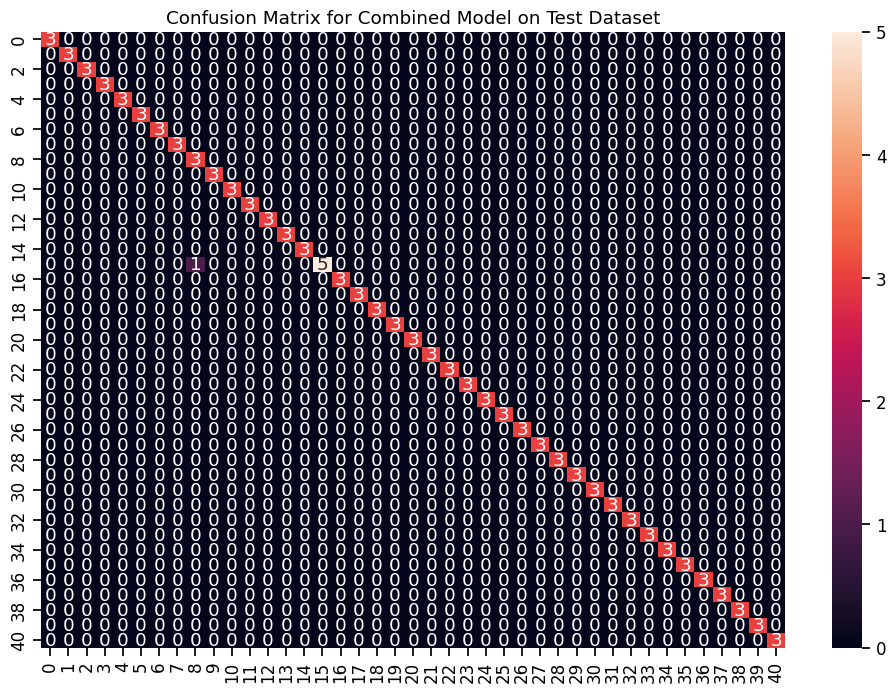

In [84]:
#testing the final model on test data
from scipy.stats import mode
svm_predictions = final_models['SVC'].predict(x_test)
nb_predictions = final_models['GaussianNB'].predict(x_test)
knn_predictions = final_models['KNN'].predict(x_test)
rf_predictions = final_models['RandomForest'].predict(x_test)
final_pred = np.array([svm_predictions, nb_predictions, knn_predictions, rf_predictions])
#final_pred = np.array([svm_predictions, rf_predictions])
print(final_pred.shape)
# Calculate the mode for each index across the four arrays
final_pred = [mode(final_pred[:, i], keepdims=False).mode for i in range(final_pred.shape[1])]
print(final_pred)
print(f"Accuracy on Test dataset by the combined model\
: {accuracy_score(y_test, final_pred)*100}")
 
cf_matrix = confusion_matrix(y_test, final_pred)
plt.figure(figsize=(12,8))
 
sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()

**saving the model into file**

In [77]:
#import pickle
#pickle.dump(final_models['KNN'] , open("models/KNN.pkl" , 'wb'))
#pickle.dump(final_models['RandomForest'] , open("models/RF.pkl" , 'wb'))
#pickle.dump(final_models['SVC'] , open("models/SVC.pkl" , 'wb'))
#pickle.dump(final_models['GaussianNB'] , open("models/NB.pkl" , 'wb'))


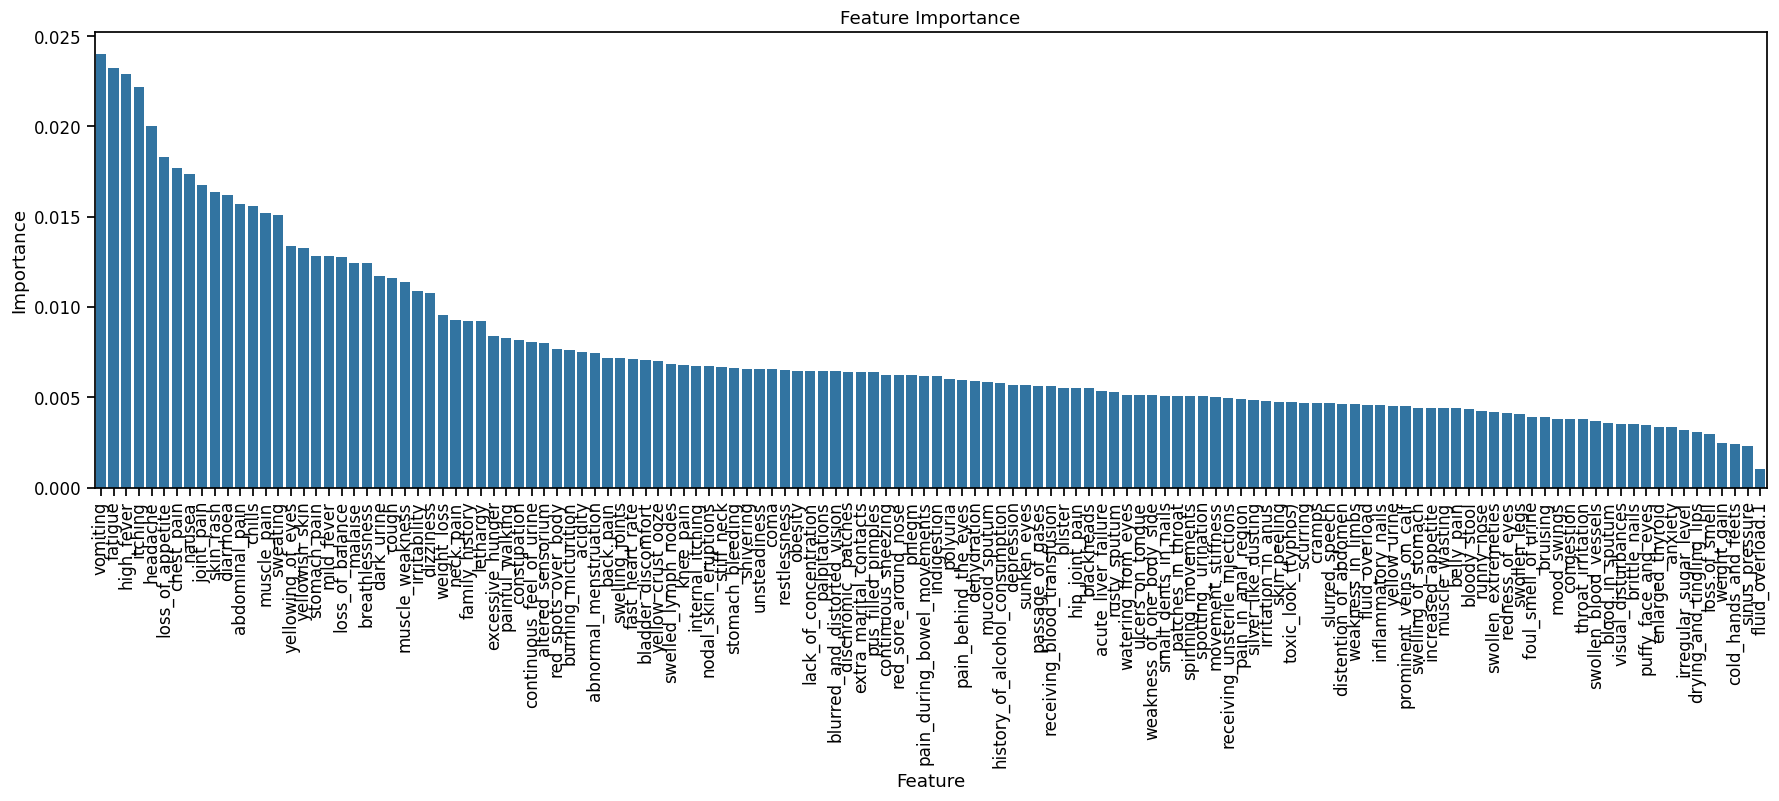

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_importance(model, feature_names):
    importance = model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance
    }).sort_values(by='Importance', ascending=False)
    # Plotting
    plt.figure(figsize=(18, 8))
    sns.barplot(x='Feature', y='Importance', data=feature_importance_df)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.title('Feature Importance')
    plt.show()

''' The function visualizes the relative importance of each feature (e.g., symptoms) in making predictions with the
provided machine learning model. This is particularly useful for understanding which features the model relies on 
the most when making its decisions.'''

plot_feature_importance(final_models["RandomForest"], features)


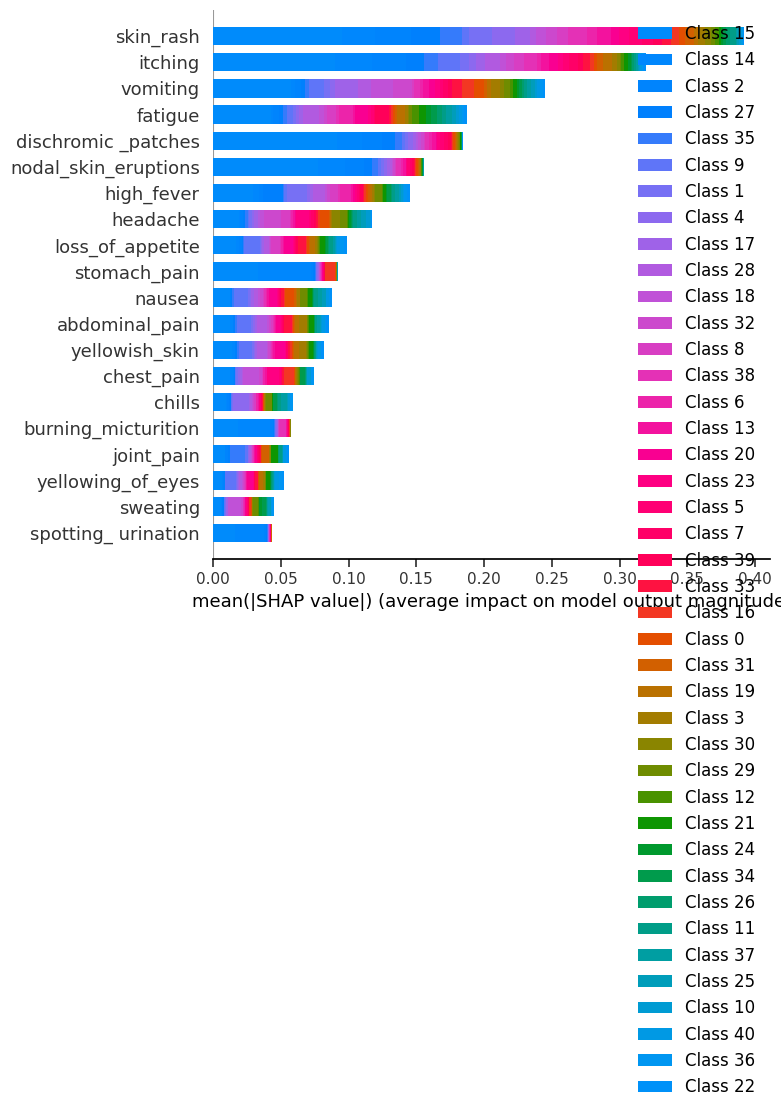

In [79]:
import shap

def explain_prediction_with_shap(model, input_data, feature_names):
    # SHAP TreeExplainer works well with tree-based models
    explainer = shap.TreeExplainer(model)
    
    # Calculate SHAP values for the input data
    shap_values = explainer.shap_values(input_data)
    
    # Plot SHAP summary plot
    shap.summary_plot(shap_values, input_data, feature_names=feature_names)
    
'''The main goal of this function is to interpret a specific prediction made by a tree-based model by 
calculating and visualizing SHAP values. SHAP values give a detailed breakdown of how much each feature 
(symptom) influenced the model's output for that particular input.'''

input_data = X.reshape(1, -1)
explain_prediction_with_shap(final_models["RandomForest"], input_data, features)


In [80]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Model prediction and confidence calculation
def get_predictions_with_confidence(model, input_data, target_names):
    predictions = model.predict(input_data) 
    probabilities = model.predict_proba(input_data)  
    
    predictions_with_confidence = []
    
    for i in range(len(predictions)):
        predicted_class = predictions[i] 
        probability = probabilities[i]  
        confidence = np.max(probability) 
        predicted_disease = target_names[predicted_class]  
        predictions_with_confidence.append((predicted_disease, confidence))
    
    return predictions_with_confidence


predictions_with_confidence = get_predictions_with_confidence(final_models["RandomForest"], X, final_pred)


#for predicted_disease, confidence in predictions_with_confidence:
    #print(f"Predicted Disease: {predicted_disease}, Confidence: {confidence:.2f}")



Predicted Disease: [21], Confidence: 1.00
Predicted Disease: [21], Confidence: 1.00
Predicted Disease: [9], Confidence: 1.00
Predicted Disease: [9], Confidence: 1.00
Predicted Disease: [9], Confidence: 1.00
Predicted Disease: [9], Confidence: 0.99
Predicted Disease: [9], Confidence: 1.00
Predicted Disease: [9], Confidence: 1.00
Predicted Disease: [9], Confidence: 1.00
Predicted Disease: [9], Confidence: 1.00
Predicted Disease: [9], Confidence: 1.00
Predicted Disease: [9], Confidence: 1.00
Predicted Disease: [0], Confidence: 1.00
Predicted Disease: [0], Confidence: 1.00
Predicted Disease: [0], Confidence: 1.00
Predicted Disease: [0], Confidence: 1.00
Predicted Disease: [0], Confidence: 1.00
Predicted Disease: [0], Confidence: 1.00
Predicted Disease: [0], Confidence: 1.00
Predicted Disease: [0], Confidence: 1.00
Predicted Disease: [0], Confidence: 1.00
Predicted Disease: [0], Confidence: 1.00
Predicted Disease: [23], Confidence: 1.00
Predicted Disease: [23], Confidence: 1.00
Predicted Di

Predicted Disease: [2], Confidence: 1.00
Predicted Disease: [2], Confidence: 1.00
Predicted Disease: [2], Confidence: 1.00
Predicted Disease: [2], Confidence: 1.00
Predicted Disease: [2], Confidence: 0.99
Predicted Disease: [2], Confidence: 1.00
Predicted Disease: [2], Confidence: 1.00
Predicted Disease: [2], Confidence: 1.00
Predicted Disease: [2], Confidence: 1.00
Predicted Disease: [27], Confidence: 1.00
Predicted Disease: [27], Confidence: 1.00
Predicted Disease: [27], Confidence: 1.00
Predicted Disease: [27], Confidence: 1.00
Predicted Disease: [27], Confidence: 0.99
Predicted Disease: [27], Confidence: 1.00
Predicted Disease: [27], Confidence: 1.00
Predicted Disease: [27], Confidence: 1.00
Predicted Disease: [27], Confidence: 1.00
Predicted Disease: [27], Confidence: 1.00
Predicted Disease: [40], Confidence: 1.00
Predicted Disease: [40], Confidence: 1.00
Predicted Disease: [40], Confidence: 1.00
Predicted Disease: [40], Confidence: 1.00
Predicted Disease: [40], Confidence: 1.00
P

Predicted Disease: [11], Confidence: 1.00
Predicted Disease: [11], Confidence: 1.00
Predicted Disease: [11], Confidence: 1.00
Predicted Disease: [11], Confidence: 1.00
Predicted Disease: [11], Confidence: 1.00
Predicted Disease: [11], Confidence: 1.00
Predicted Disease: [11], Confidence: 1.00
Predicted Disease: [11], Confidence: 1.00
Predicted Disease: [1], Confidence: 1.00
Predicted Disease: [1], Confidence: 1.00
Predicted Disease: [1], Confidence: 1.00
Predicted Disease: [1], Confidence: 1.00
Predicted Disease: [1], Confidence: 1.00
Predicted Disease: [1], Confidence: 1.00
Predicted Disease: [1], Confidence: 1.00
Predicted Disease: [1], Confidence: 1.00
Predicted Disease: [1], Confidence: 1.00
Predicted Disease: [1], Confidence: 1.00
Predicted Disease: [22], Confidence: 1.00
Predicted Disease: [22], Confidence: 1.00
Predicted Disease: [22], Confidence: 1.00
Predicted Disease: [22], Confidence: 1.00
Predicted Disease: [22], Confidence: 1.00
Predicted Disease: [22], Confidence: 1.00
Pr

Predicted Disease: [34], Confidence: 1.00
Predicted Disease: [34], Confidence: 1.00
Predicted Disease: [34], Confidence: 1.00
Predicted Disease: [34], Confidence: 1.00
Predicted Disease: [34], Confidence: 1.00
Predicted Disease: [34], Confidence: 1.00
Predicted Disease: [34], Confidence: 1.00
Predicted Disease: [34], Confidence: 1.00
Predicted Disease: [29], Confidence: 1.00
Predicted Disease: [29], Confidence: 1.00
Predicted Disease: [29], Confidence: 1.00
Predicted Disease: [29], Confidence: 1.00
Predicted Disease: [29], Confidence: 1.00
Predicted Disease: [29], Confidence: 1.00
Predicted Disease: [29], Confidence: 1.00
Predicted Disease: [29], Confidence: 1.00
Predicted Disease: [29], Confidence: 1.00
Predicted Disease: [29], Confidence: 1.00
Predicted Disease: [14], Confidence: 1.00
Predicted Disease: [14], Confidence: 1.00
Predicted Disease: [14], Confidence: 1.00
Predicted Disease: [14], Confidence: 1.00
Predicted Disease: [14], Confidence: 1.00
Predicted Disease: [14], Confidenc

Predicted Disease: [10], Confidence: 1.00
Predicted Disease: [10], Confidence: 1.00
Predicted Disease: [10], Confidence: 1.00
Predicted Disease: [10], Confidence: 1.00
Predicted Disease: [10], Confidence: 1.00
Predicted Disease: [10], Confidence: 1.00
Predicted Disease: [10], Confidence: 1.00
Predicted Disease: [10], Confidence: 1.00
Predicted Disease: [3], Confidence: 1.00
Predicted Disease: [3], Confidence: 1.00
Predicted Disease: [3], Confidence: 1.00
Predicted Disease: [3], Confidence: 1.00
Predicted Disease: [3], Confidence: 1.00
Predicted Disease: [3], Confidence: 1.00
Predicted Disease: [3], Confidence: 1.00
Predicted Disease: [3], Confidence: 1.00
Predicted Disease: [3], Confidence: 1.00
Predicted Disease: [3], Confidence: 1.00
Predicted Disease: [36], Confidence: 1.00
Predicted Disease: [36], Confidence: 1.00
Predicted Disease: [36], Confidence: 1.00
Predicted Disease: [36], Confidence: 1.00
Predicted Disease: [36], Confidence: 1.00
Predicted Disease: [36], Confidence: 1.00
Pr

Predicted Disease: [16], Confidence: 1.00
Predicted Disease: [38], Confidence: 1.00
Predicted Disease: [5], Confidence: 1.00
Predicted Disease: [34], Confidence: 1.00
Predicted Disease: [29], Confidence: 1.00
Predicted Disease: [14], Confidence: 1.00
Predicted Disease: [8], Confidence: 1.00
Predicted Disease: [6], Confidence: 1.00
Predicted Disease: [28], Confidence: 1.00
Predicted Disease: [25], Confidence: 1.00
Predicted Disease: [4], Confidence: 1.00
Predicted Disease: [7], Confidence: 1.00
Predicted Disease: [11], Confidence: 1.00
Predicted Disease: [1], Confidence: 1.00
Predicted Disease: [22], Confidence: 1.00
Predicted Disease: [39], Confidence: 1.00
Predicted Disease: [12], Confidence: 1.00
Predicted Disease: [24], Confidence: 1.00
Predicted Disease: [13], Confidence: 1.00
Predicted Disease: [18], Confidence: 1.00
Predicted Disease: [17], Confidence: 1.00
Predicted Disease: [30], Confidence: 1.00
Predicted Disease: [2], Confidence: 1.00
Predicted Disease: [27], Confidence: 1.00

Predicted Disease: [17], Confidence: 1.00
Predicted Disease: [30], Confidence: 1.00
Predicted Disease: [2], Confidence: 1.00
Predicted Disease: [27], Confidence: 1.00
Predicted Disease: [40], Confidence: 1.00
Predicted Disease: [19], Confidence: 1.00
Predicted Disease: [20], Confidence: 1.00
Predicted Disease: [21], Confidence: 1.00
Predicted Disease: [9], Confidence: 1.00
Predicted Disease: [0], Confidence: 1.00
Predicted Disease: [23], Confidence: 1.00
Predicted Disease: [31], Confidence: 1.00
Predicted Disease: [32], Confidence: 1.00
Predicted Disease: [37], Confidence: 1.00
Predicted Disease: [35], Confidence: 1.00
Predicted Disease: [10], Confidence: 1.00
Predicted Disease: [3], Confidence: 1.00
Predicted Disease: [36], Confidence: 1.00
Predicted Disease: [26], Confidence: 1.00
Predicted Disease: [33], Confidence: 1.00
Predicted Disease: [15], Confidence: 1.00
Predicted Disease: [16], Confidence: 1.00
Predicted Disease: [38], Confidence: 1.00
Predicted Disease: [5], Confidence: 1.

Predicted Disease: [5], Confidence: 1.00
Predicted Disease: [34], Confidence: 1.00
Predicted Disease: [29], Confidence: 1.00
Predicted Disease: [14], Confidence: 1.00
Predicted Disease: [8], Confidence: 1.00
Predicted Disease: [6], Confidence: 1.00
Predicted Disease: [28], Confidence: 1.00
Predicted Disease: [25], Confidence: 1.00
Predicted Disease: [4], Confidence: 1.00
Predicted Disease: [7], Confidence: 1.00
Predicted Disease: [11], Confidence: 1.00
Predicted Disease: [1], Confidence: 1.00
Predicted Disease: [22], Confidence: 1.00
Predicted Disease: [39], Confidence: 1.00
Predicted Disease: [12], Confidence: 1.00
Predicted Disease: [24], Confidence: 1.00
Predicted Disease: [13], Confidence: 1.00
Predicted Disease: [18], Confidence: 1.00
Predicted Disease: [17], Confidence: 1.00
Predicted Disease: [30], Confidence: 1.00
Predicted Disease: [2], Confidence: 1.00
Predicted Disease: [27], Confidence: 1.00
Predicted Disease: [40], Confidence: 1.00
Predicted Disease: [19], Confidence: 1.00

Predicted Disease: [34], Confidence: 1.00
Predicted Disease: [29], Confidence: 1.00
Predicted Disease: [14], Confidence: 1.00
Predicted Disease: [8], Confidence: 1.00
Predicted Disease: [6], Confidence: 1.00
Predicted Disease: [28], Confidence: 1.00
Predicted Disease: [25], Confidence: 1.00
Predicted Disease: [4], Confidence: 1.00
Predicted Disease: [7], Confidence: 1.00
Predicted Disease: [11], Confidence: 1.00
Predicted Disease: [1], Confidence: 1.00
Predicted Disease: [22], Confidence: 1.00
Predicted Disease: [39], Confidence: 1.00
Predicted Disease: [12], Confidence: 1.00
Predicted Disease: [24], Confidence: 1.00
Predicted Disease: [13], Confidence: 1.00
Predicted Disease: [18], Confidence: 1.00
Predicted Disease: [17], Confidence: 1.00
Predicted Disease: [30], Confidence: 1.00
Predicted Disease: [2], Confidence: 1.00
Predicted Disease: [27], Confidence: 1.00
Predicted Disease: [40], Confidence: 1.00
Predicted Disease: [19], Confidence: 1.00
Predicted Disease: [20], Confidence: 1.0

Predicted Disease: [20], Confidence: 1.00
Predicted Disease: [21], Confidence: 1.00
Predicted Disease: [9], Confidence: 1.00
Predicted Disease: [0], Confidence: 1.00
Predicted Disease: [23], Confidence: 1.00
Predicted Disease: [31], Confidence: 1.00
Predicted Disease: [32], Confidence: 1.00
Predicted Disease: [37], Confidence: 1.00
Predicted Disease: [35], Confidence: 1.00
Predicted Disease: [10], Confidence: 1.00
Predicted Disease: [3], Confidence: 1.00
Predicted Disease: [36], Confidence: 1.00
Predicted Disease: [26], Confidence: 1.00
Predicted Disease: [33], Confidence: 1.00
Predicted Disease: [15], Confidence: 1.00
Predicted Disease: [16], Confidence: 1.00
Predicted Disease: [38], Confidence: 1.00
Predicted Disease: [5], Confidence: 1.00
Predicted Disease: [34], Confidence: 1.00
Predicted Disease: [29], Confidence: 1.00
Predicted Disease: [14], Confidence: 1.00
Predicted Disease: [8], Confidence: 1.00
Predicted Disease: [6], Confidence: 1.00
Predicted Disease: [28], Confidence: 1.0

Predicted Disease: [16], Confidence: 1.00
Predicted Disease: [38], Confidence: 1.00
Predicted Disease: [5], Confidence: 1.00
Predicted Disease: [34], Confidence: 1.00
